## **Naive Bayes using Python**

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [307]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]

In [308]:
df.columns = ['label', 'message']

In [309]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [310]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


### **Data Visualization and Analysis**

In [311]:
df.isna().sum().sum()

0

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [313]:
df.describe(include = 'all')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [314]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [315]:
df['message'].value_counts().sum()

5572

In [316]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [317]:
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


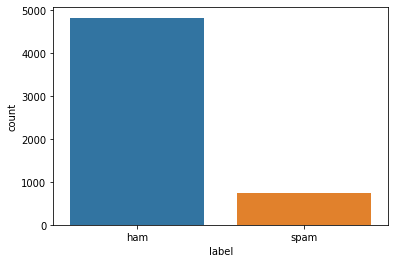

In [318]:
import seaborn as sns

sns.countplot(data=df, x='label')

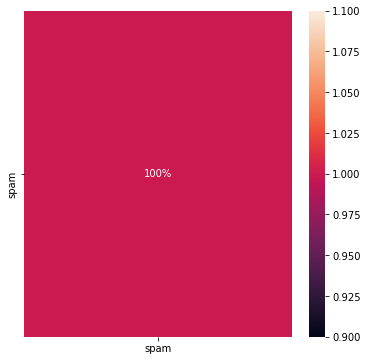

In [319]:
plt.figure(figsize = (6, 6))
sns.heatmap(df.iloc[:,:].corr(), annot = True, fmt = '.0%')

### **Train Test Split**

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( df.message ,
                                                    df.spam )

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4179,)
(4179,)
(1393,)
(1393,)


### **Training, Prediction and Accuracy**

In [321]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [322]:
from sklearn.naive_bayes import MultinomialNB

NBayesModel = MultinomialNB()
NBayesModel.fit(X_train_count, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [323]:
sampleEmails = [
    'Hello tabish, are you available for tomorrow for group study?',
    'Upto 70% discount on online shopping, exclusive offer just for you. Dont miss this reward!'
]

emails_count = cv.transform(sampleEmails)
NBayesModel.predict(emails_count)

array([0, 0])

In [324]:
from sklearn.metrics import accuracy_score

accuracyScore = cv.transform(X_test)
print("Accuracy Score is", NBayesModel.score(accuracyScore, Y_test))

Accuracy Score is 0.9899497487437185


## **K-Means using Python**

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [326]:
df = pd.read_csv('income.csv')

In [327]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [328]:
df.tail()

,Name,Age,Income
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


### **Data Visualization and Analysis**

In [329]:
df.isna().sum().sum()

0

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [331]:
df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [332]:
df['Name'].value_counts()

Michael     1
Tom         1
Brad        1
Kory        1
Ranbir      1
Donald      1
Ismail      1
Gautam      1
Jared       1
Angelina    1
Arnold      1
Dipika      1
Andrea      1
Priyanka    1
Sid         1
Alia        1
Rob         1
Nick        1
Stark       1
David       1
Abdul       1
Mohan       1
Name: Name, dtype: int64

In [333]:
df['Age'].value_counts()

29    3
41    3
39    3
28    2
27    2
26    1
43    1
42    1
40    1
38    1
37    1
36    1
35    1
32    1
Name: Age, dtype: int64

In [334]:
df['Income'].value_counts()

51000     1
49500     1
160000    1
64000     1
90000     1
65000     1
130000    1
82000     1
61000     1
53000     1
162000    1
156000    1
150000    1
70000     1
48000     1
137000    1
80000     1
58000     1
155000    1
45000     1
63000     1
60000     1
Name: Income, dtype: int64

Text(0, 0.5, 'Income')

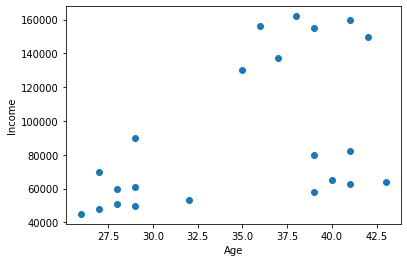

In [335]:
plt.scatter(df.Age, df.Income)
plt.xlabel('Age')
plt.ylabel('Income')

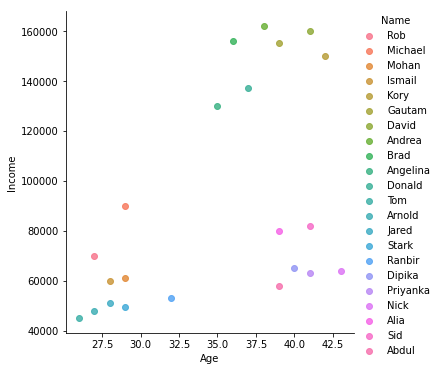

In [336]:
sns.lmplot(x='Age', y = 'Income', hue='Name', data=df)

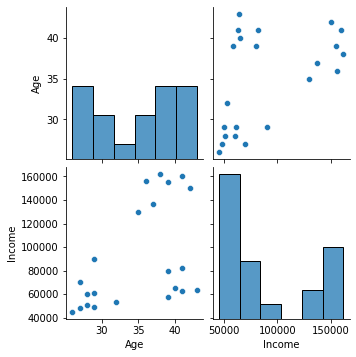

In [337]:
sns.pairplot(df, palette = 'inferno')

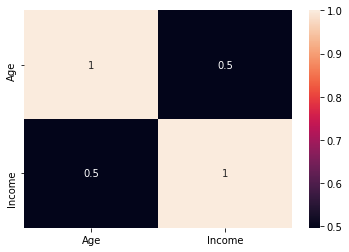

In [338]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)

### **Training, Prediction and Accuracy**

In [339]:
from sklearn.cluster import KMeans

kMeans = KMeans(n_clusters = 3)
y_predicted = kMeans.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [340]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [341]:
kMeans.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

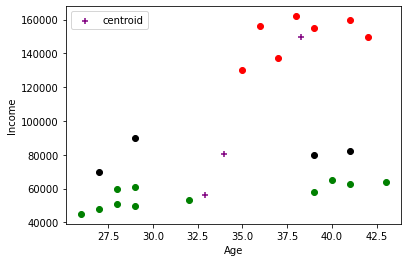

In [342]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')

plt.scatter(kMeans.cluster_centers_[:,0], kMeans.cluster_centers_[:,1], color='purple', marker='+', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

### **Preprocessing using min max scaler**

In [343]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [344]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


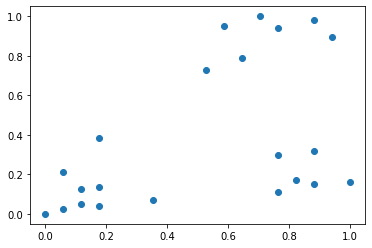

In [345]:
plt.scatter(df.Age, df['Income'])

In [346]:
kMeans = KMeans(n_clusters = 3)
y_predicted = kMeans.fit_predict(df[['Age', 'Income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [347]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [348]:
kMeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

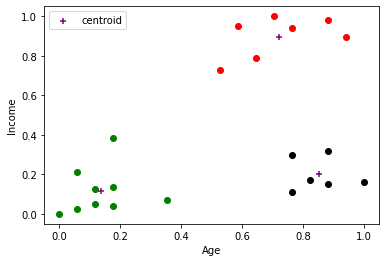

In [349]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')

plt.scatter(kMeans.cluster_centers_[:,0], kMeans.cluster_centers_[:,1], color='purple', marker='+', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

### **Elbow Plot**

In [350]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

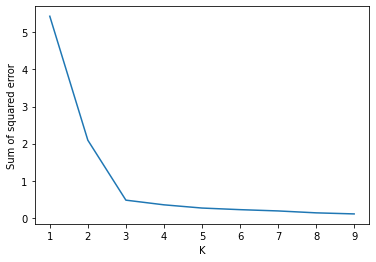

In [351]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)